In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime

In [ ]:
import psutil
train_folder = [7554,7556,7557,7558]#,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
for j in train_folder:
    for i in range(3,20,8):
        url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
        data = pd.read_csv(url)
        #print(data.info())
        data.columns = data.columns.str.replace(' ', '')
        submit_time = data.iloc[-1][0]
        start_time = data.iloc[-2][0]
        data.dropna(inplace=True)
        data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
        data['X'] = data.X.astype(float)

        x = data.X.tolist()
        y = data.Y.tolist()

        fig=plt.figure(figsize=(5,3))
        ax=fig.add_subplot(111)

        plt.gca().invert_yaxis()
        ax.scatter(x,y,s=1,c='red')
        ax.set_xbound(lower=0.0, upper=1381)
        ax.set_ybound(lower=0.0, upper=925)

        plt.tight_layout()
        plt.show()

In [56]:
data = pd.read_csv(r'train/7560/SimpleTest/13.csv')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          651 non-null    object 
 1    Y         649 non-null    float64
 2    Pressure  649 non-null    float64
 3    TiltX     649 non-null    float64
 4    TiltY     649 non-null    float64
 5    Time      649 non-null    object 
dtypes: float64(4), object(2)
memory usage: 30.6+ KB


In [58]:
print(data.columns)
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,713.7825,769.500000,0.397949,12655.0,6470.0,00:02.5591808
1,713.07,769.626667,0.404541,12655.0,6470.0,00:02.5742882
2,711.36,768.993333,0.381836,12639.0,6439.0,00:02.5883502


In [59]:
data.columns = data.columns.str.replace(' ', '')

In [60]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

In [61]:
data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
data['X'] = data.X.astype(float)

In [62]:
#data = data.set_index(pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time).drop("Time", axis = 1)

In [63]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,713.7825,769.500000,0.397949,12655.0,6470.0,00:00:02.559180
1,713.0700,769.626667,0.404541,12655.0,6470.0,00:00:02.574288
2,711.3600,768.993333,0.381836,12639.0,6439.0,00:00:02.588350


<IPython.core.display.Javascript object>


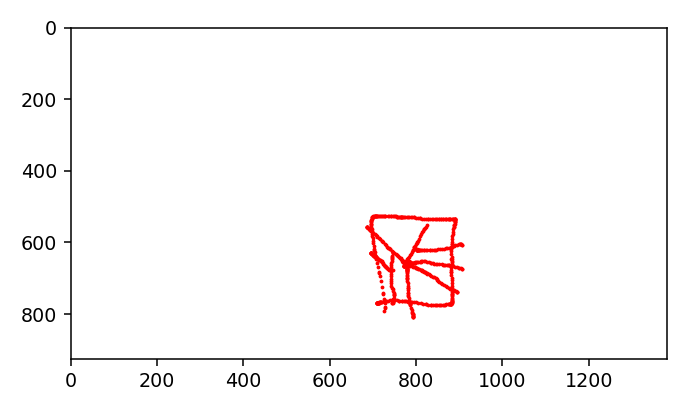

In [64]:
x = data.X.tolist()
y = data.Y.tolist()

fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

plt.gca().invert_yaxis()
ax.scatter(x,y,s=1,c='red')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)

plt.tight_layout()
plt.show()

In [65]:
data.Pressure.mean()

0.7408990845290832

<IPython.core.display.Javascript object>


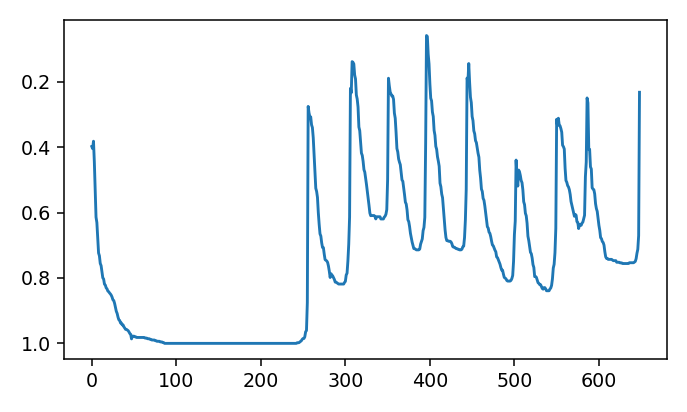

In [66]:
import psutil

plt.rcParams['animation.html'] = 'jshtml'
p = data.Pressure.tolist()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)
plt.gca().invert_yaxis()


#ax.hist(data.Time,p,c='red',s=1)
ax.plot(p)

plt.tight_layout()
plt.show()

In [88]:
data.Pressure.sort_values().head(10)

396    0.058594
397    0.061523
398    0.115723
308    0.138428
309    0.140625
446    0.144287
310    0.145508
399    0.145752
311    0.179443
444    0.188721
Name: Pressure, dtype: float64

In [77]:
hand_raising = 0
for i in range (len(x)-1):
    if (x[i+1]-x[i] > 10 or y[i+1] -y[i] >10):
        #if(p[i] > data.Pressure.median()): 
            hand_raising +=1
            #print(i, i+1)
            #print('x[i],y[i] :',x[i],',',y[i])
            #print('x[i+1], y[i+1] : ',x[i+1],',',y[i+1])
    
print("There are " + str(hand_raising) + " hand raising in the drawing")  

There are 13 hand raising in the drawing


<IPython.core.display.Javascript object>


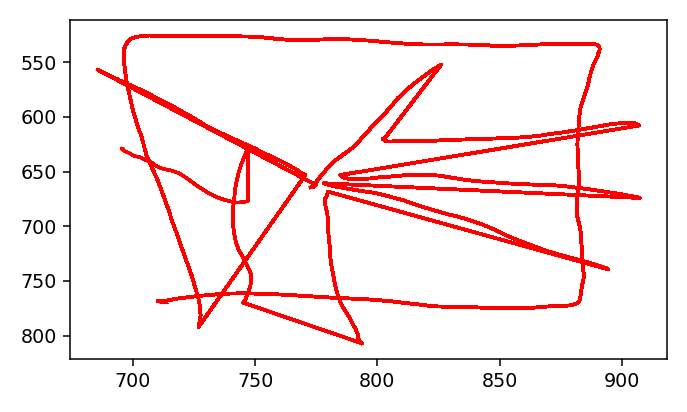

In [67]:

import psutil
%matplotlib notebook

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [68]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(x[i])
    d.append(y[i])
    
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()